# **PRESENTATION DE L'ETAT D'AVANCEMENT DES TRAVAUX**

## **Thème :** Apprentissage par ensemble pour la prédiction de la résistance à la compression des bétons de hautes performances (BHPs)                          


## **Auteur** : ANANJOU TSAFACK Ornéla Stéla

## **Encadreurs**: Dr. TIOGNING Lauraine et Dr. MELATAGIA Paulin

## **I) Thématique**


*   **Thème** : Prédiction de la résistance mécanique des bétons de hautes performances (BHPs).

*   **Question Scientifique** : Quel modèle d'apprentissage par ensemble permet de prédire au mieux la résistance à la compression des BHPs?

*   **Objectif Scientifique** : Construire un modèle d'apprentissage par ensemble qui prédise efficacement la résistance à la compression des BHPs


*   **Type de problème** : Un problème de régression







##  **II) Données**

### **1) Informations sur les Données** :
Le jeu de donné provient de https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength sous
le nom de **Concrete Compressive Strength DataSet** .
Il compte **1030 observations** , **9 variables**( *ciment, scories de haut fourneaux, cendres volantes, l’eau, le super-plastifiant, les agrégats de coarse, les particules fines, l’âge* ) et une variable cible correspondant à la ***résistance mécanique***.


### **2) Présentation des données**

In [1]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np

In [2]:
#creation d'un dataframe panda
df=pd.read_excel("Concrete_Data.xls")

In [3]:
# affichage des donnees
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### **3) Visualisation des données**

In [4]:
# Renommage des noms des variables caracteristiques
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(df.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

data = df.rename(columns=mapper)

data.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


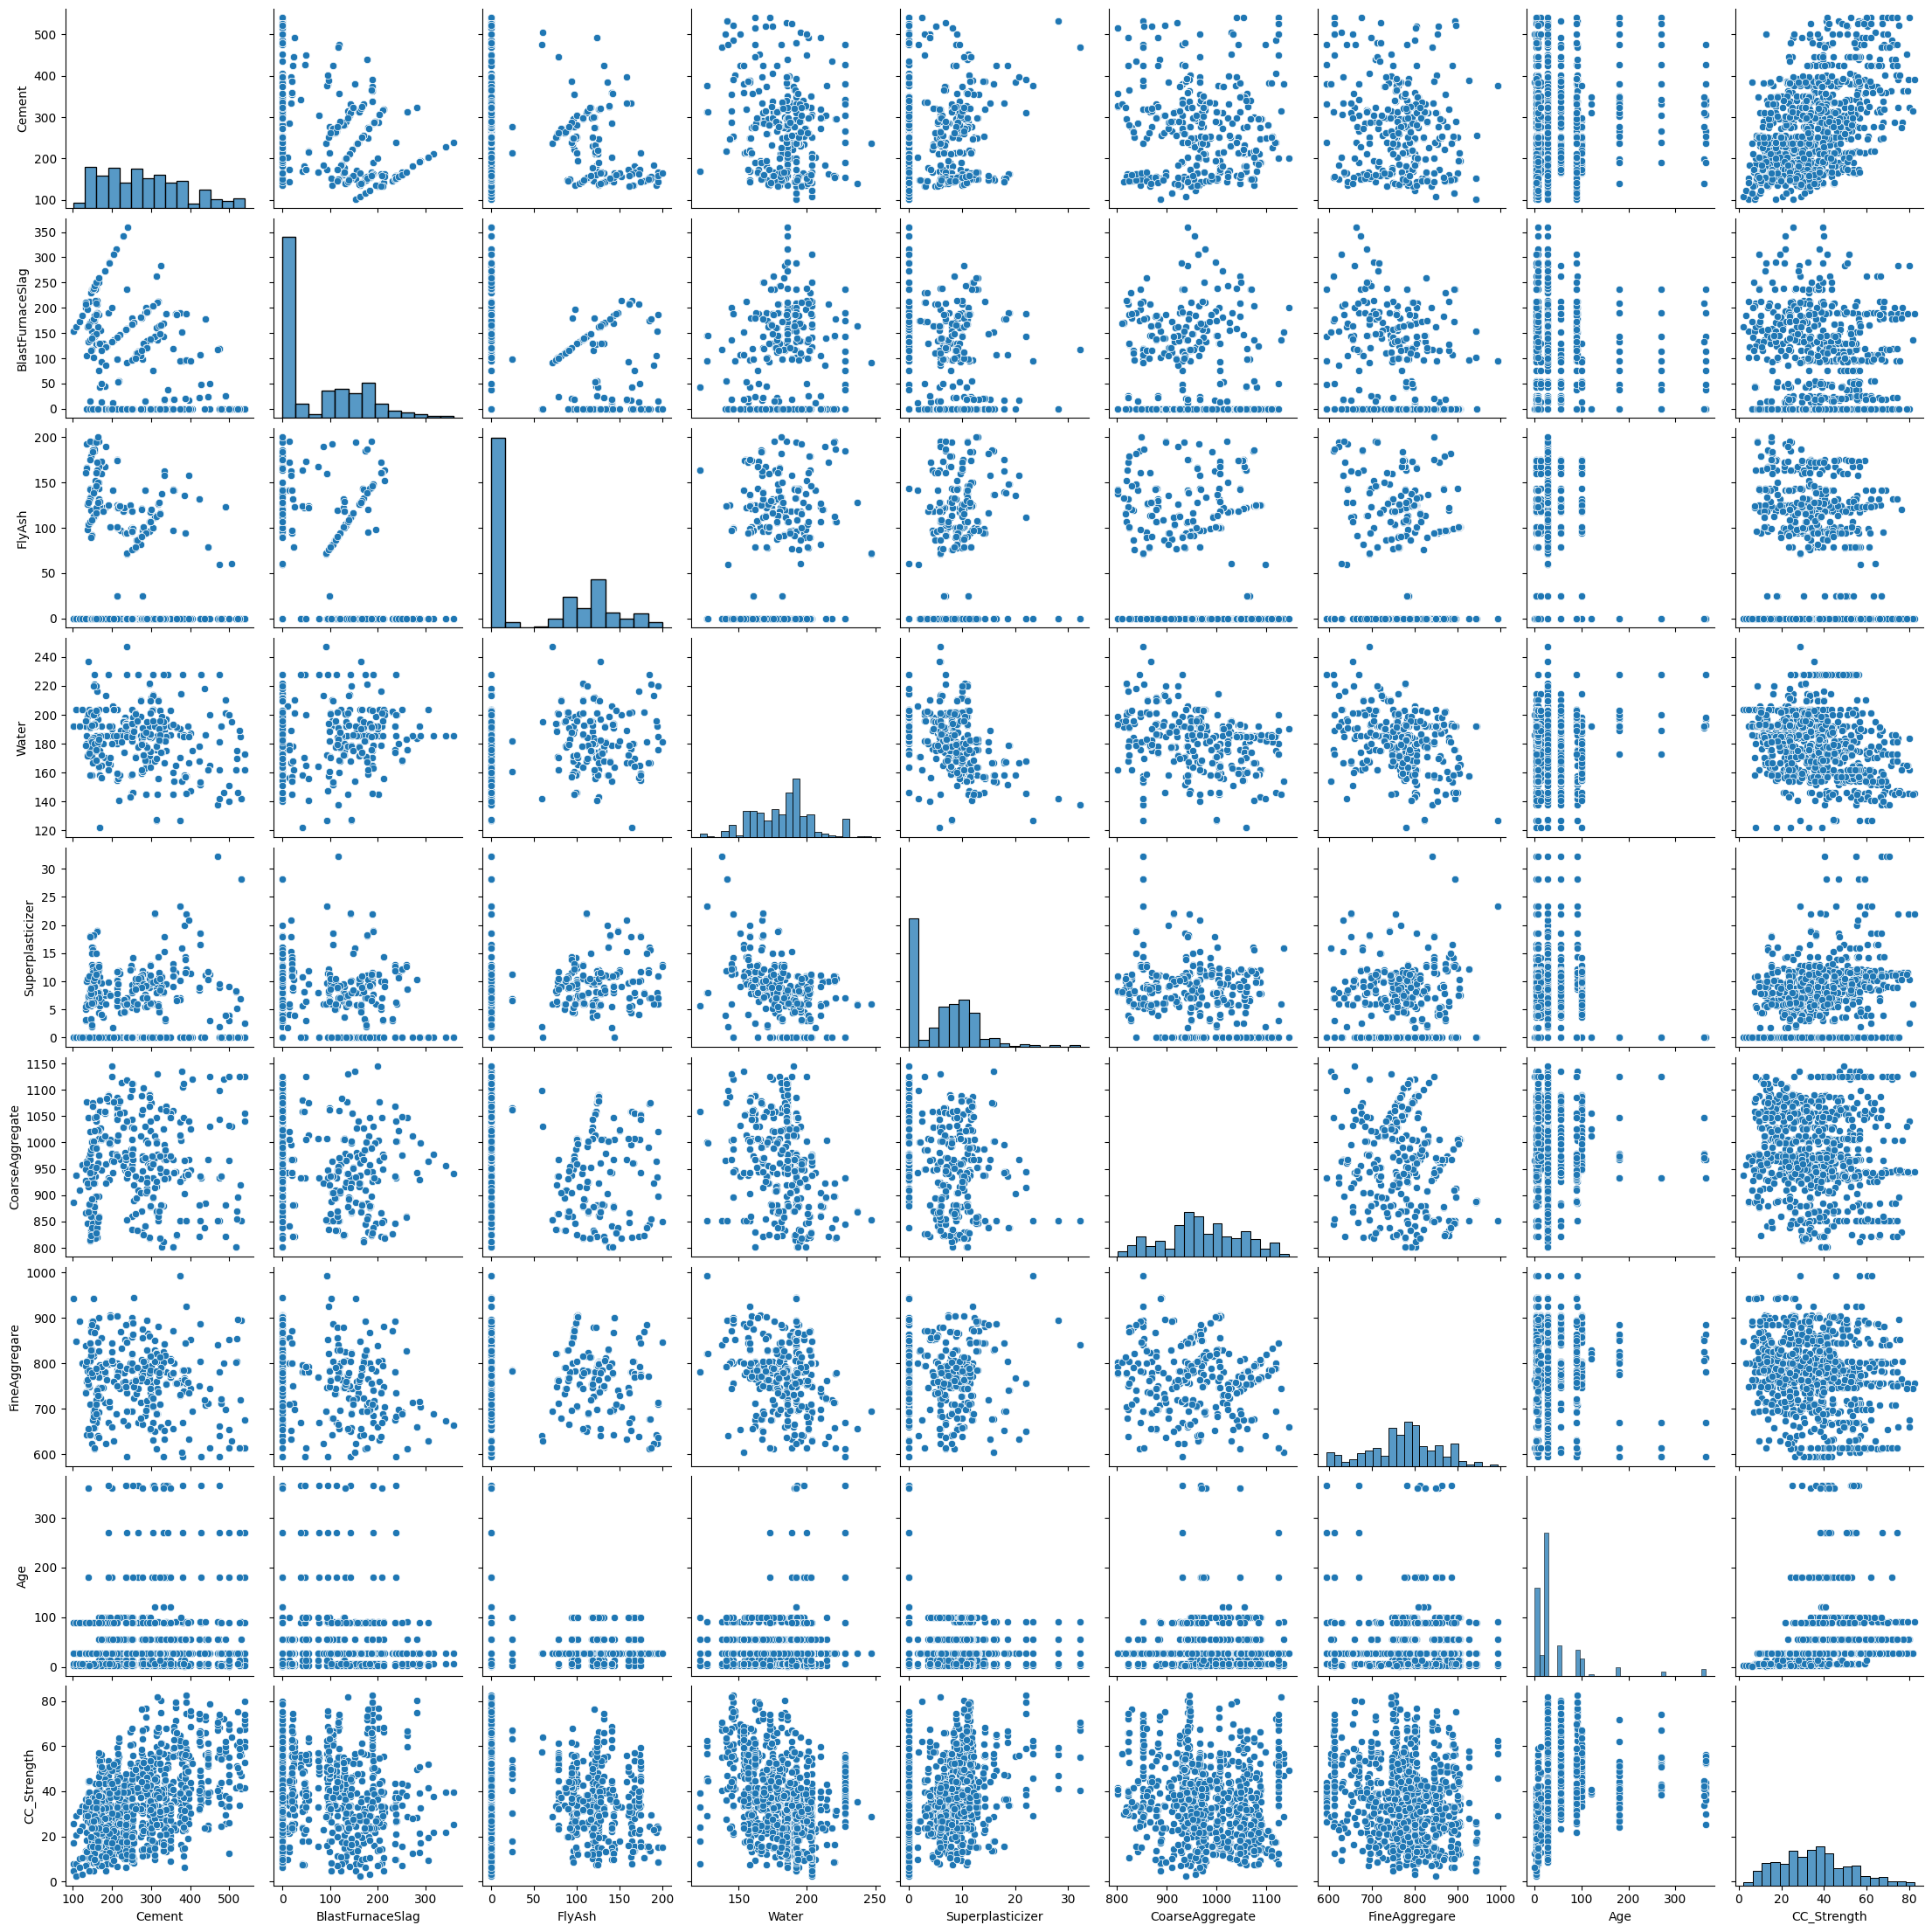

In [5]:
#Affichage d'un scatterplot pour chaque pair de variables
sns.pairplot(data)
plt.show()
#for interpretation
#• When high values of v1 go with high values of v2, v1 and v2 are positively
#associated.
#• When high values of v1 go with low values of v2, v1 and v2 are negatively
#associated.

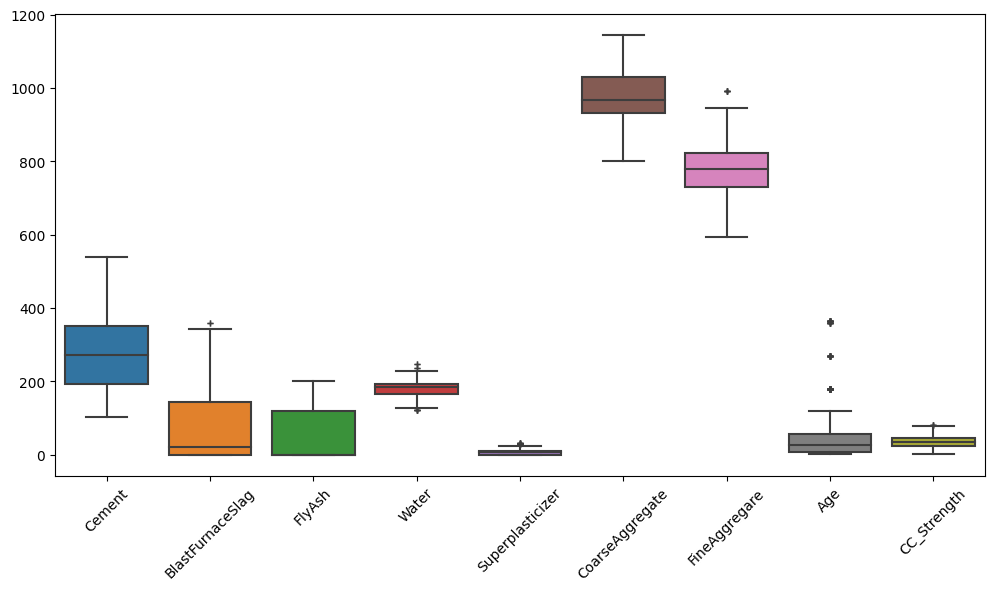

In [6]:
# Vérification des valeurs aberrantes
#Boxplots (see “Percentiles and Boxplots” on page 20) are a simple way to visually
#compare the distributions of a numeric variable grouped according to a categorical variable
plt.subplots(figsize=(12, 6))#aggrandir la figure
ax = sns.boxplot(data=data,flierprops={"marker": "+"})
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);# faire roter les labels

#Alaska stands out as having the fewest delays, while American has the most delays:
# the lower quartile for American is higher than the upper quartile for Alaska.

[Text(0, 0, 'Cement'),
 Text(1, 0, 'BlastFurnaceSlag'),
 Text(2, 0, 'FlyAsh'),
 Text(3, 0, 'Water'),
 Text(4, 0, 'Superplasticizer'),
 Text(5, 0, 'CoarseAggregate'),
 Text(6, 0, 'FineAggregare'),
 Text(7, 0, 'Age'),
 Text(8, 0, 'CC_Strength')]

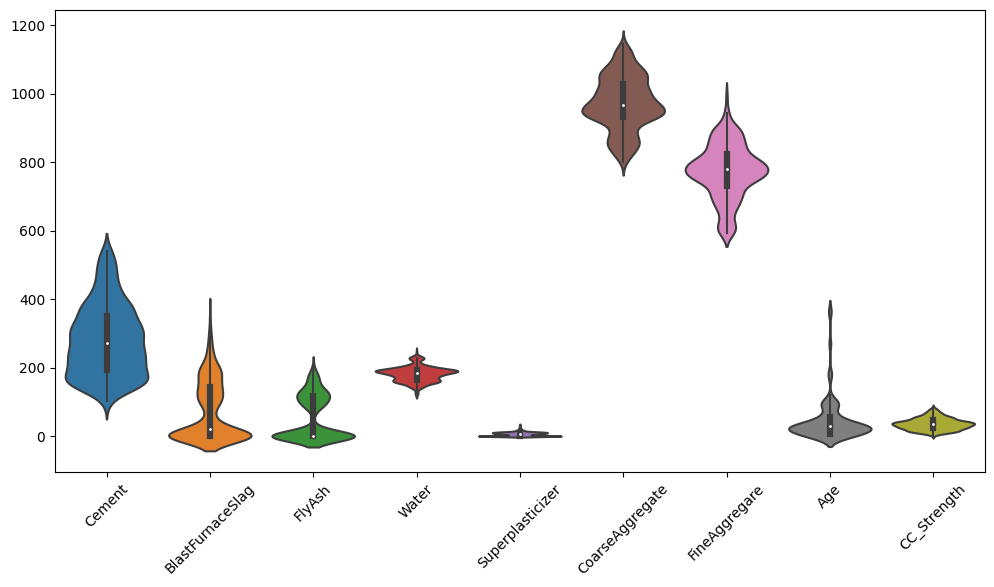

In [7]:
# violinplot is an enhancement to the boxplot
# and plots the density estimate with the density on the y-axis. The density is mirrored
# and flipped over, and the resulting shape is filled in, creating an image resembling a
# violin. The advantage of a violin plot is that it can show nuances in the distribution
# that aren’t perceptible in a boxplot.
plt.subplots(figsize=(12, 6))
vp=sns.violinplot(data=data,scale='count')
vp.set_xticklabels(ax.get_xticklabels(), rotation=45)

In [8]:
?sns.regplot()

Object `sns.regplot()` not found.


Variable  Cement


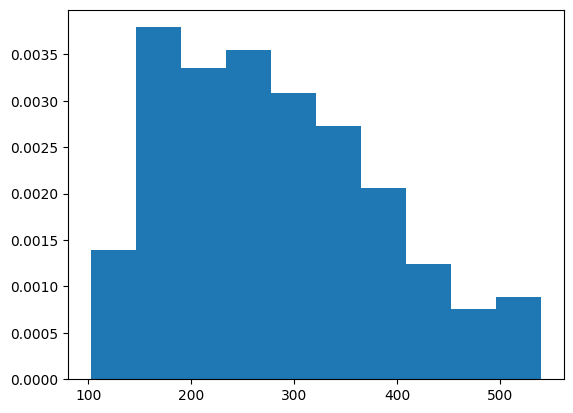

Variable  BlastFurnaceSlag


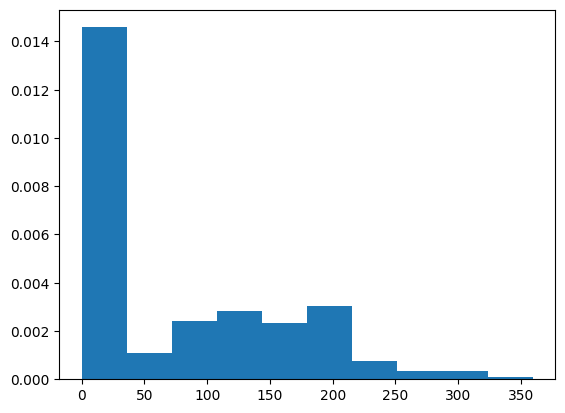

Variable  FlyAsh


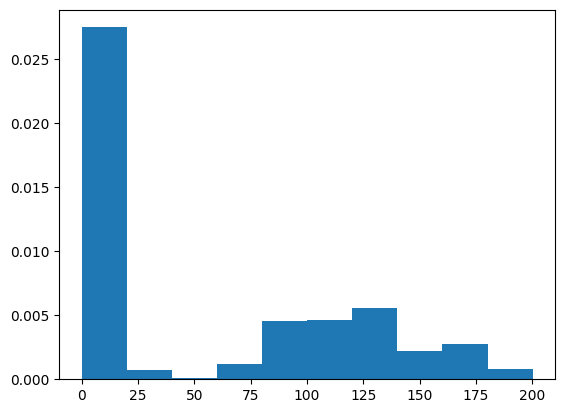

Variable  Water


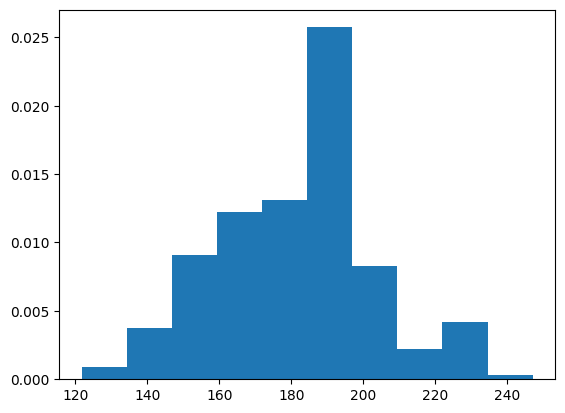

Variable  Superplasticizer


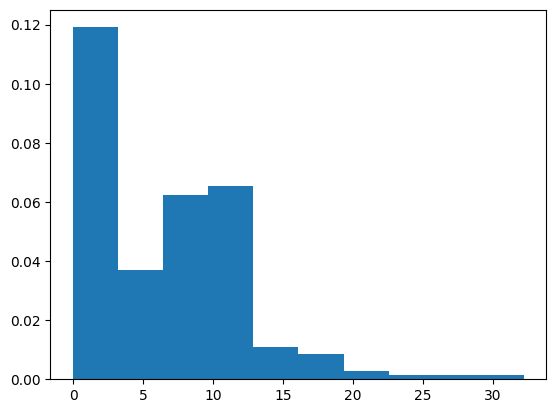

Variable  CoarseAggregate


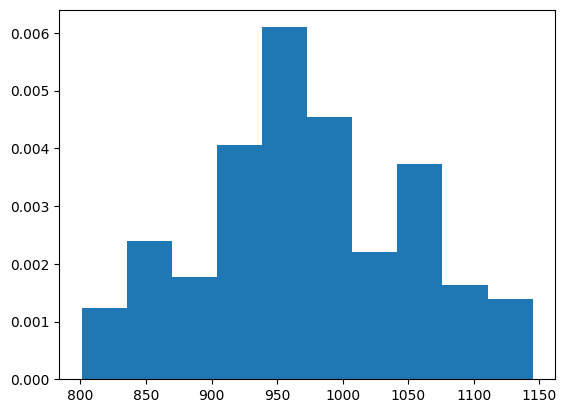

Variable  FineAggregare


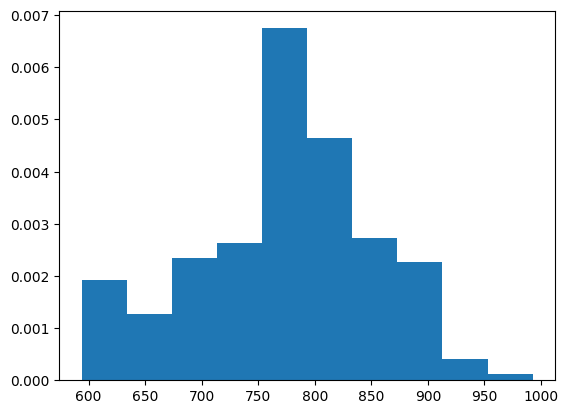

Variable  Age


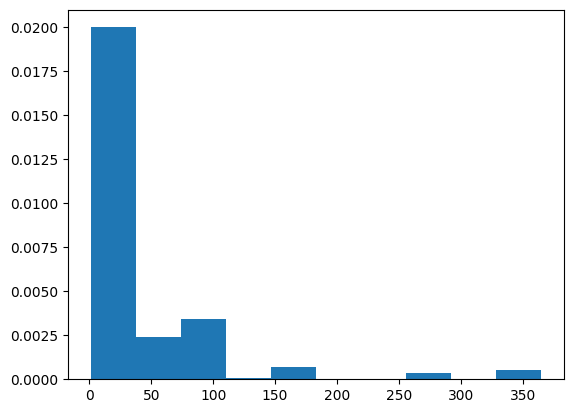

Variable  CC_Strength


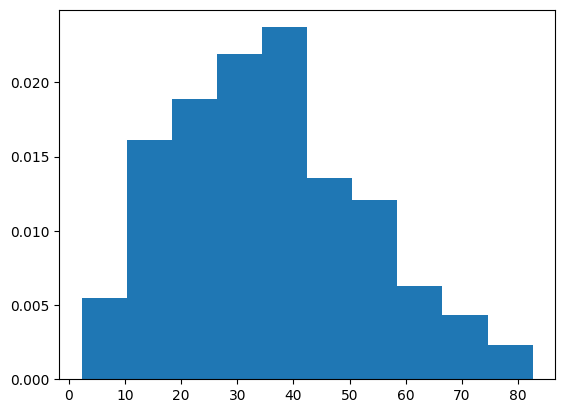

In [9]:
#histogramme de chaque variable
for name in data.columns:
  print('Variable ', name)
  plt.hist(data[name],density=True)
  plt.show()

/tmp/ipykernel_3323/3999641302.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i],color='green',rug=True)
/tmp/ipykernel_3323/3999641302.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data[i],color='green',rug=True)
/tmp/ipykernel_3323/3999641302.py:12: UserWarning: 

`

ValueError: num must be 1 <= num <= 8, not 9

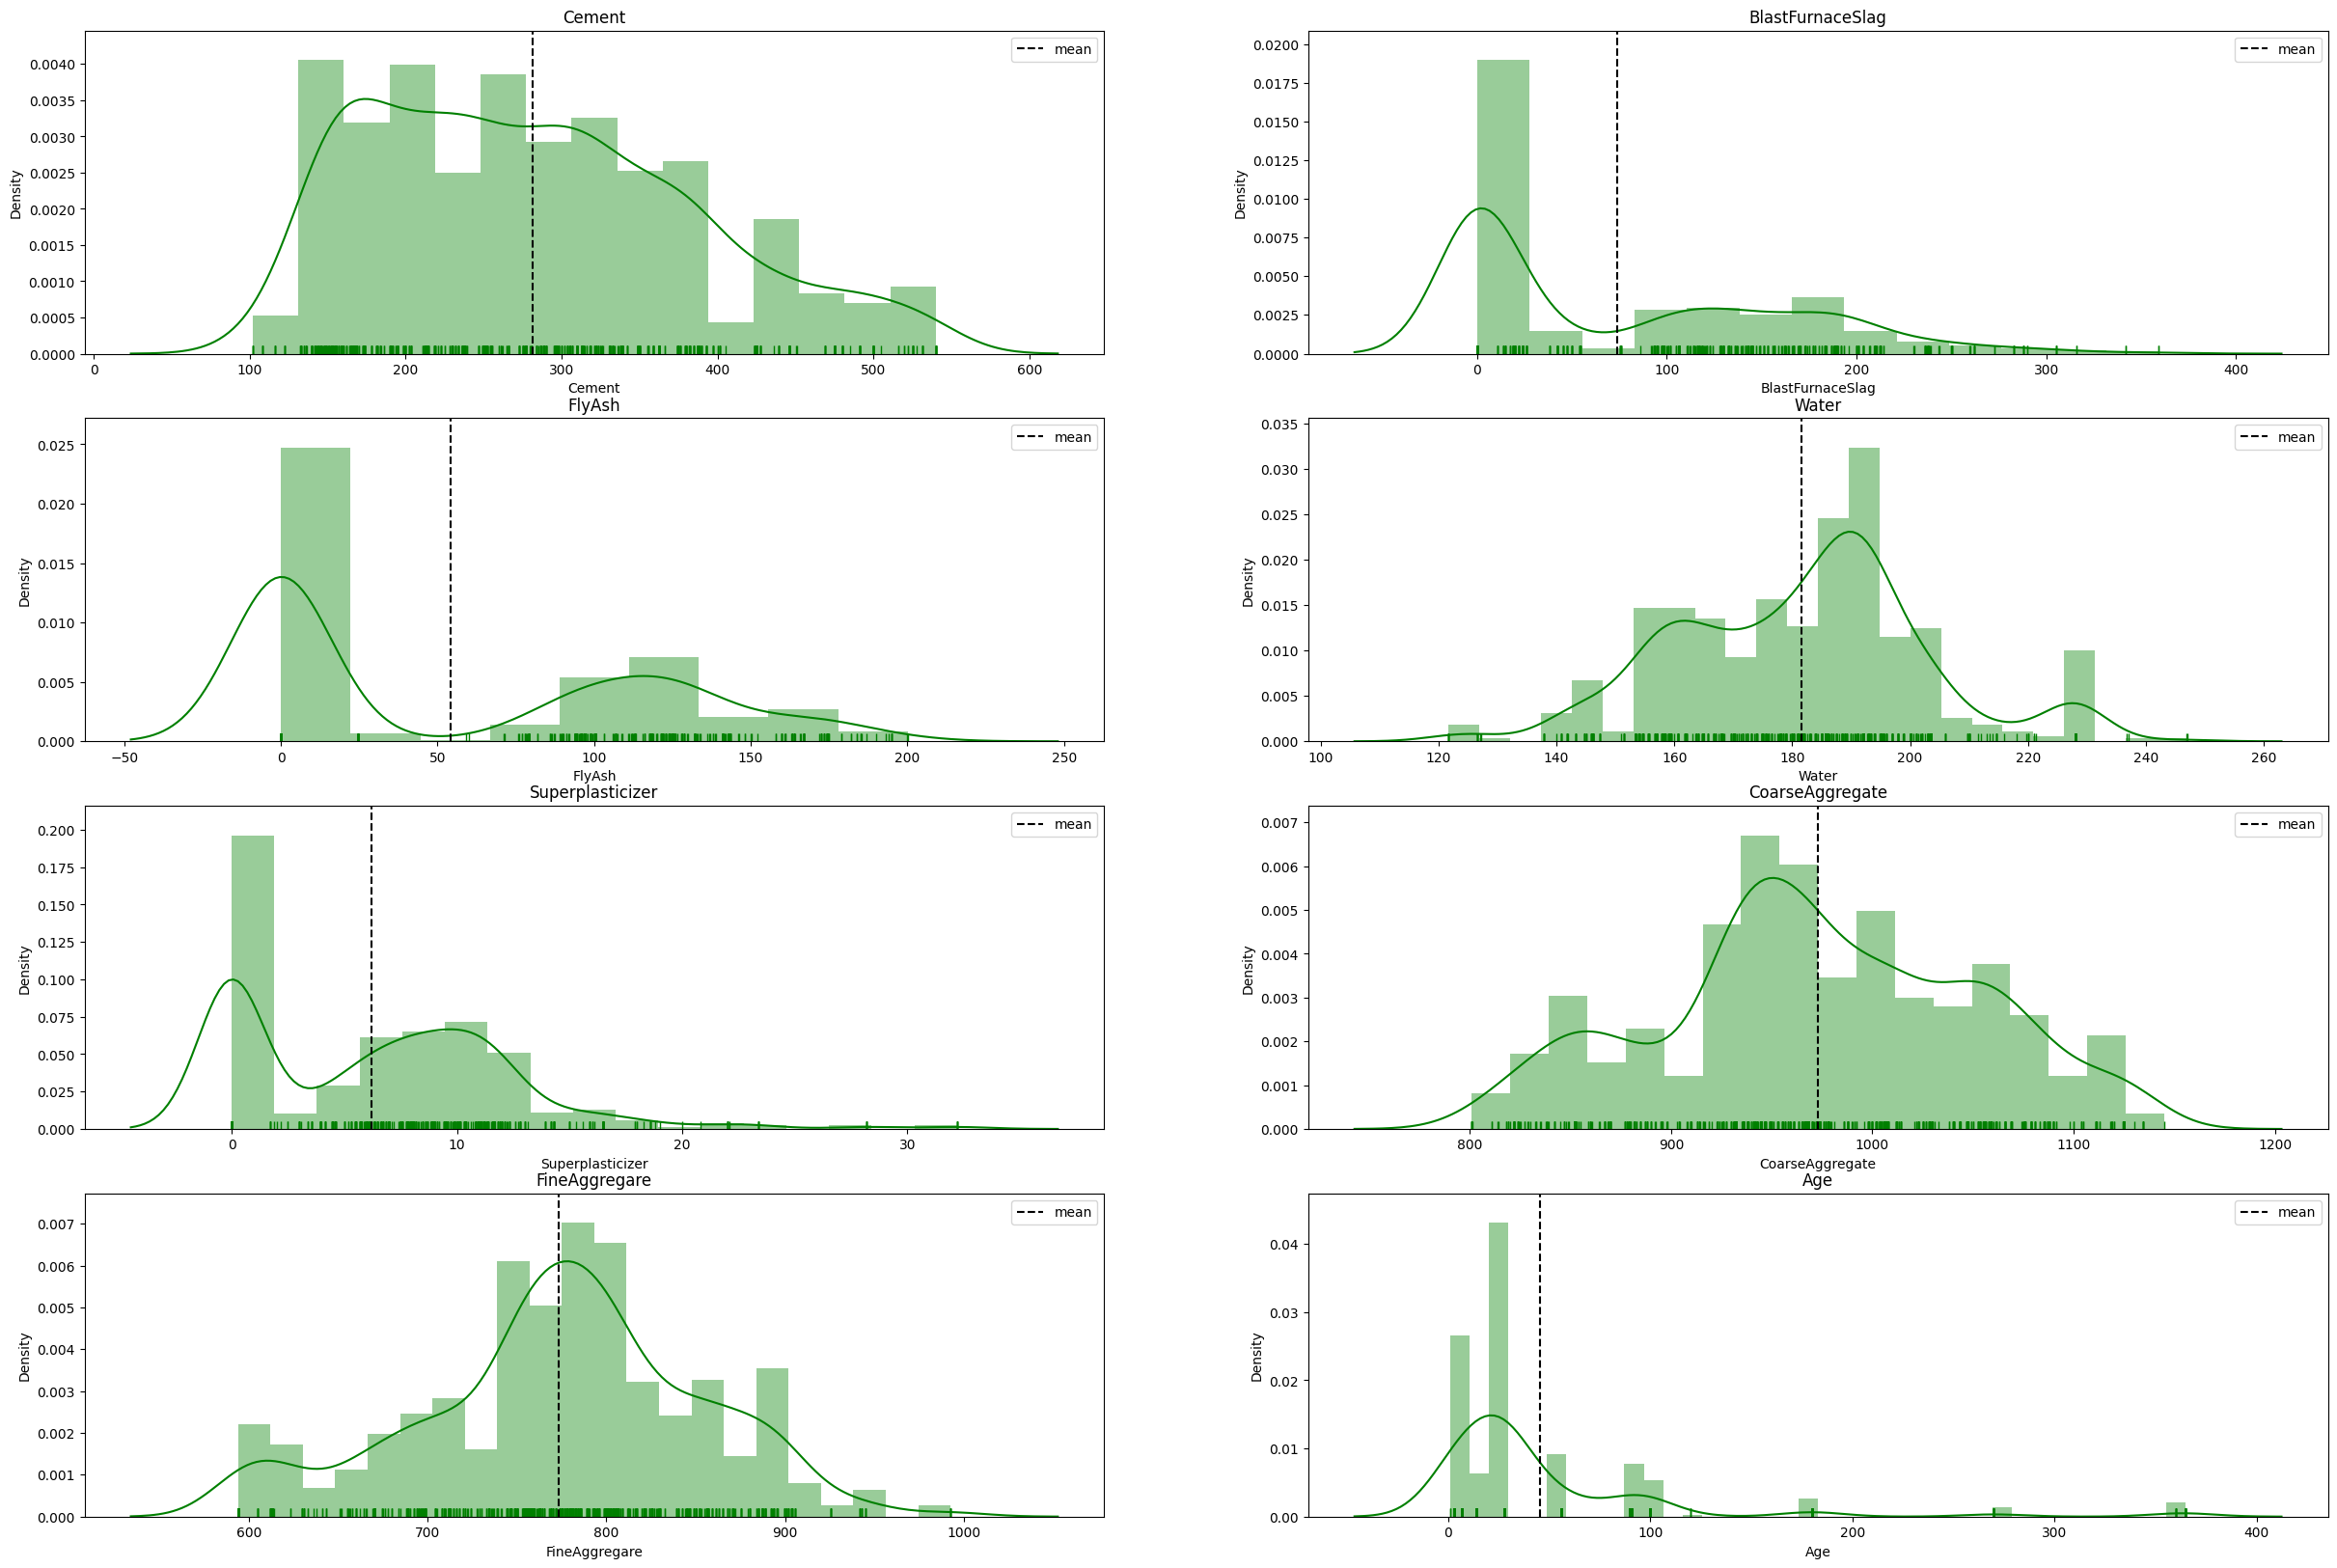

In [10]:
# Affichage du graphe de densite
#A key distinction from the histogram plotted in Figure 1-3 is the scale of the y-axis: a
#density plot corresponds to plotting the histogram as a proportion rather than counts
import itertools

cols = [i for i in data.columns if i != 'strength']

fig = plt.figure(figsize=(30, 20))

for i,j in itertools.zip_longest(cols, range(len(cols))):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(data[i],color='green',rug=True)
    plt.axvline(data[i].mean(),linestyle="dashed",label="mean", color='black')
    plt.legend()
    plt.title(i)
#     plt.xlabel(i)

In [ ]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement (component 1)(kg in a m^3 mixture)                1030 non-null float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    1030 non-null float64
Fly Ash (component 3)(kg in a m^3 mixture)               1030 non-null float64
Water  (component 4)(kg in a m^3 mixture)                1030 non-null float64
Superplasticizer (component 5)(kg in a m^3 mixture)      1030 non-null float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     1030 non-null float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        1030 non-null float64
Age (day)                                                1030 non-null int64
Concrete compressive strength(MPa, megapascals)          1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
data.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


### **Realisation de l'organigramme de l'article de base** 

#### 1)La normalisation du dataset

In [12]:
# Normalisation z-score ou standardisation
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

normData=scaler.fit_transform(data)

In [13]:
normData

array([[ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  2.64519215],
       [ 2.47791782, -0.85688631, -0.84713204, ..., -1.21765845,
        -0.27973311,  1.5612771 ],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -2.24091255,
         3.55306569,  0.26660766],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ...,  0.08012724,
        -0.27973311, -0.7259282 ],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.19118775,
        -0.27973311, -0.18264932],
       [-0.19401043,  0.30850389,  0.37696733, ..., -0.15072887,
        -0.27973311, -0.20461667]])

In [14]:
normData=pd.DataFrame(normData)
normData

,0,1,2,3,4,5,6,7,8
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753
...,...,...,...,...,...,...,...,...,...
1025,-0.045623,0.488241,0.564569,-0.092122,0.451695,-1.323003,-0.065874,-0.279733,0.507051
1026,0.392837,-0.856886,0.960095,0.676201,0.702927,-1.994679,0.496916,-0.279733,-0.277827
1027,-1.270057,0.759585,0.850661,0.521599,-0.017270,-1.036061,0.080127,-0.279733,-0.725928
1028,-1.168580,1.308072,-0.847132,-0.279518,0.853666,0.214646,0.191188,-0.279733,-0.182649


In [15]:
req_col_names = ["Cement", "BlastFurnaceSlag", "FlyAsh", "Water", "Superplasticizer",
                 "CoarseAggregate", "FineAggregare", "Age", "CC_Strength"]
curr_col_names = list(normData.columns)

mapper = {}
for i, name in enumerate(curr_col_names):
    mapper[name] = req_col_names[i]

normData = normData.rename(columns=mapper)

normData.head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
0,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,0.863160,-1.217658,-0.279733,2.645192
1,2.477918,-0.856886,-0.847132,-0.916663,-0.620225,1.056170,-1.217658,-0.279733,1.561277
2,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,3.553066,0.266608
3,0.491443,0.795533,-0.847132,2.175367,-1.038944,-0.526514,-2.240913,5.057677,0.313515
4,-0.790432,0.678414,-0.847132,0.488805,-1.038944,0.070531,0.647908,4.978487,0.507753


Variable  Cement


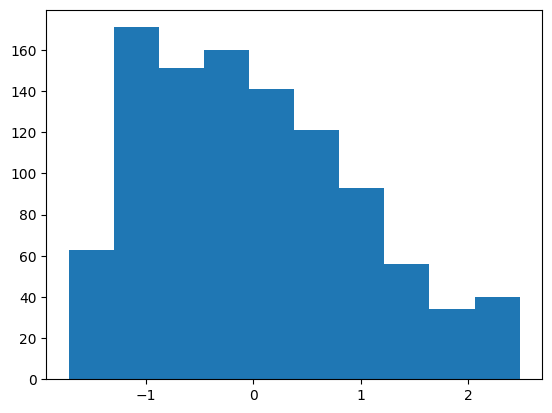

Variable  BlastFurnaceSlag


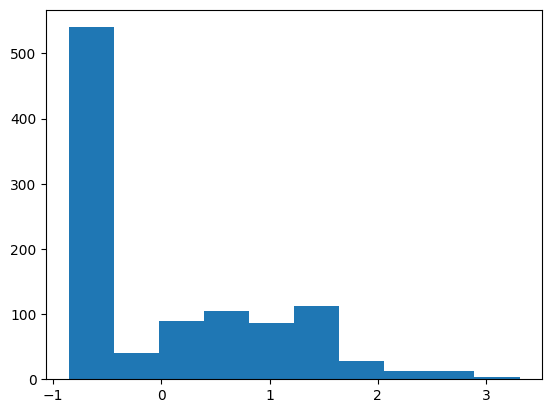

Variable  FlyAsh


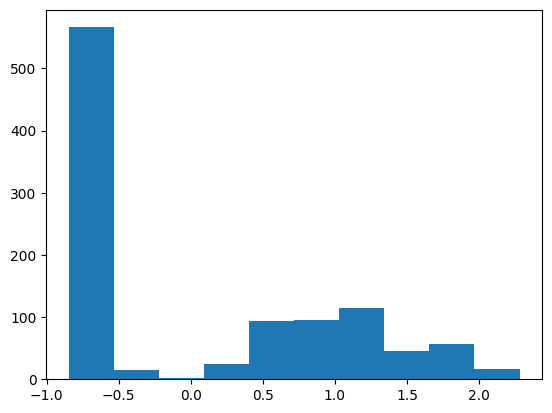

Variable  Water


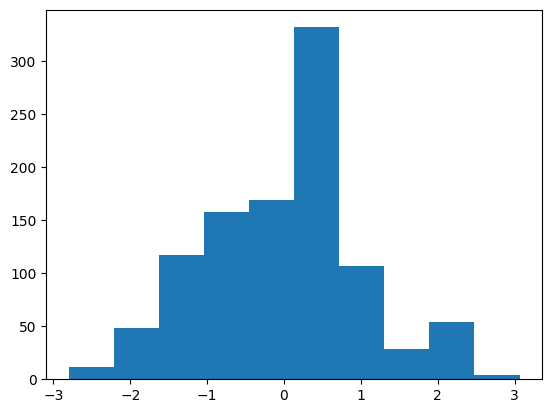

Variable  Superplasticizer


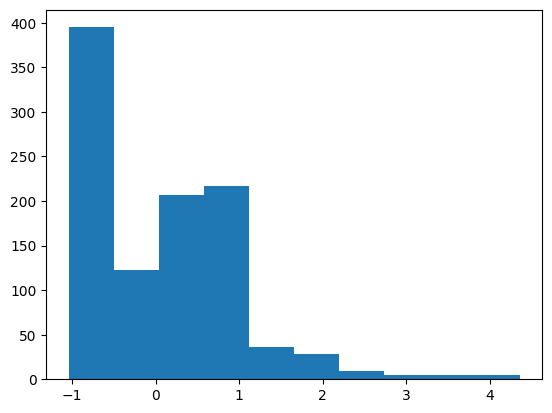

Variable  CoarseAggregate


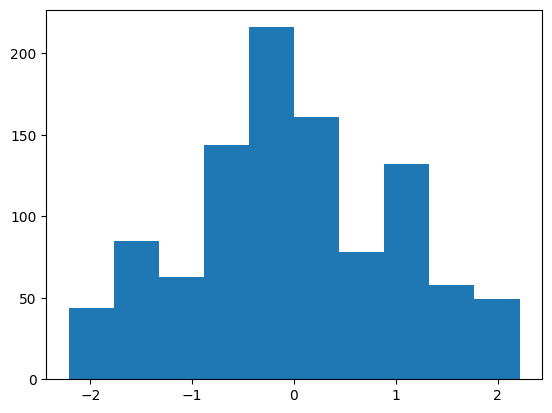

Variable  FineAggregare


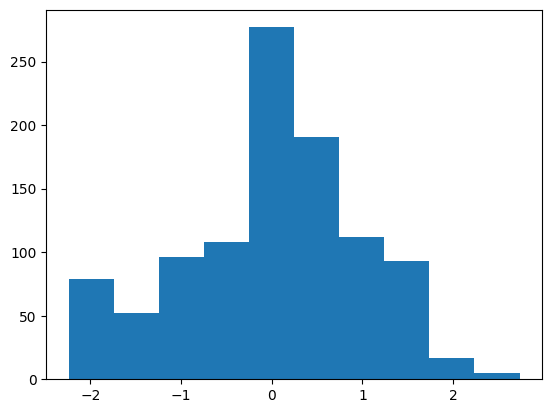

Variable  Age


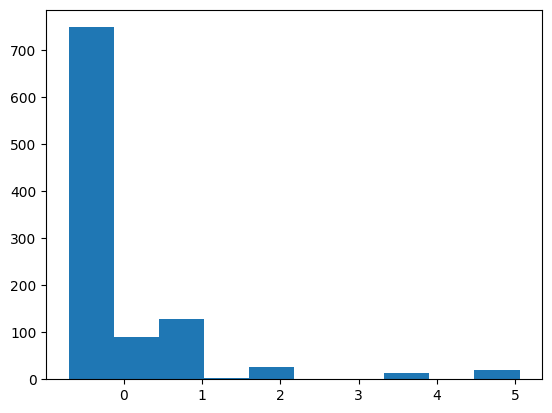

Variable  CC_Strength


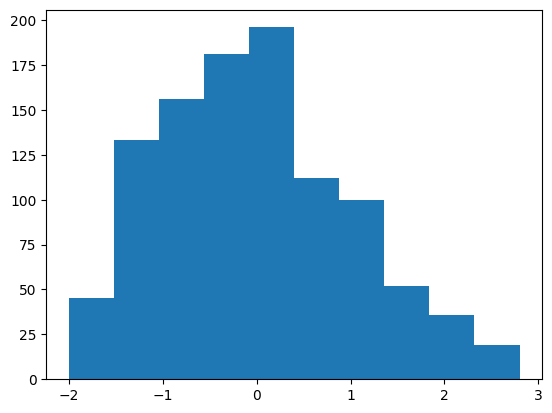

In [16]:
for name in normData.columns:
  print('Variable ', name)
  plt.hist(normData[name])
  plt.show()

In [17]:
normData.describe()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregare,Age,CC_Strength
count,1.030000e+03,1030.000000,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03,1.030000e+03
mean,9.657862e-17,0.000000,2.759389e-17,3.587206e-16,-2.759389e-17,2.276496e-16,-1.931572e-16,2.069542e-17,2.759389e-16
std,1.000486e+00,1.000486,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00,1.000486e+00
min,-1.715219e+00,-0.856886,-8.471320e-01,-2.802333e+00,-1.038944e+00,-2.212137e+00,-2.240913e+00,-7.073594e-01,-2.005443e+00
25%,-8.500258e-01,-0.856886,-8.471320e-01,-7.808013e-01,-1.038944e+00,-5.265140e-01,-5.319534e-01,-6.123314e-01,-7.252985e-01
50%,-7.912996e-02,-0.601776,-8.471320e-01,1.608624e-01,2.460198e-02,-6.328926e-02,7.401267e-02,-2.797331e-01,-8.235105e-02
75%,6.589771e-01,0.800751,1.001836e+00,4.888051e-01,6.627297e-01,7.267662e-01,6.291904e-01,1.637312e-01,6.179613e-01
max,2.477918e+00,3.310688,2.281122e+00,3.065497e+00,4.354156e+00,2.214232e+00,2.733101e+00,5.057677e+00,2.801689e+00


#### 2) Fractionnment des donnees en jeu d'entrainement et de test

In [18]:
# Ici on fractionne notre dataset et 90 et 10 comme l'article de base (leur dataset etait de 1228 exemples)
from sklearn.model_selection import train_test_split

X = normData.iloc[:,:-1]
y = normData.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

#### 3) Entrainement des differents modeles

##### **a) Random Forest**

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 0.32 		 0.10 		0.23 		0.89


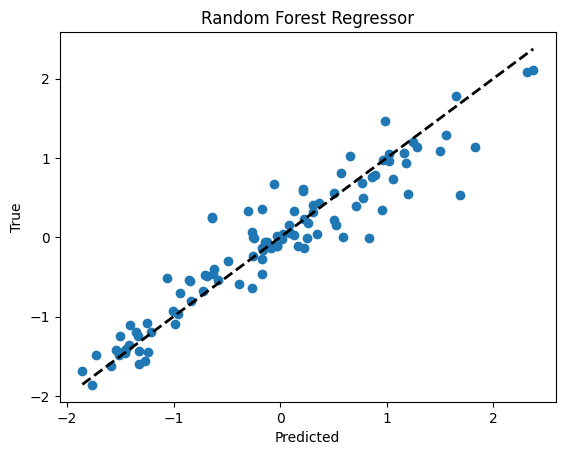

In [19]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from metrics.mean_poisson_deviance import mean_poisson_deviance
# from metrics.mean_gamma_deviance import mean_gamma_deviance 
# from metrics.max_error import max_error
from sklearn.ensemble import RandomForestRegressor


rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
            np.sqrt(mean_squared_error(y_test, y_pred_rfr)),mean_squared_error(y_test, y_pred_rfr),
            mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor")
plt.show()

##### **b) Extremely Randomised trees(Extra Trees)**

In [20]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor(n_estimators=100, random_state=0)
etr.fit(X_train, y_train)
y_pred_etr=etr.predict(X_test)
etr_r2=etr.score(X_test,y_test)

print("Model \t\t\t\t R2")
print("Extra Trees Regressor \t\t{:.2f}".format(etr_r2))


Model 				 R2
Extra Trees Regressor 		0.92


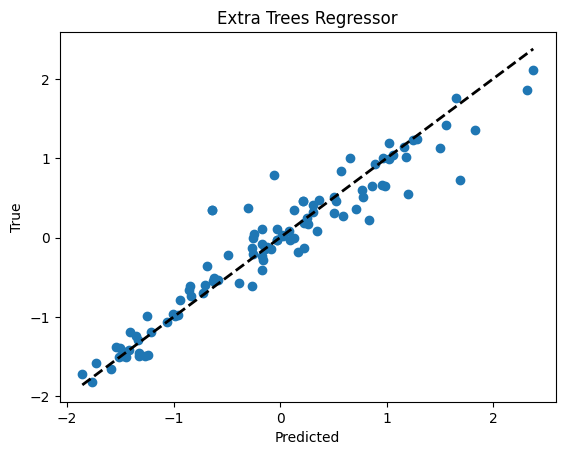

In [21]:
plt.scatter(y_test, y_pred_etr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Extra Trees Regressor")
plt.show()

##### **c) Adaptative Boosting(Adaboost)**

In [22]:
from sklearn.ensemble import AdaBoostRegressor

abr = AdaBoostRegressor(n_estimators=100, random_state=0)
abr.fit(X_train, y_train)
y_pred_abr=abr.predict(X_test)
abr_r2=abr.score(X_test,y_test)

print("Model \t\t\t\t R2")
print("AdaBoost Regressor \t\t{:.2f}".format(abr_r2))


Model 				 R2
AdaBoost Regressor 		0.77


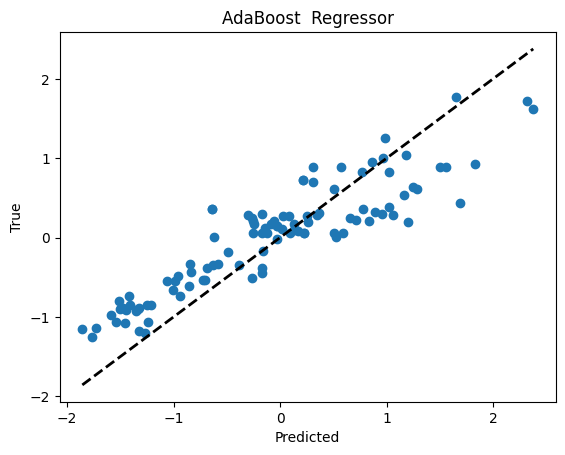

In [23]:
plt.scatter(y_test, y_pred_abr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("AdaBoost  Regressor")
plt.show()

##### **d) Gradient Boosting Machine(GBM)**

In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state=0)
gbr.fit(X_train, y_train)
y_pred_gbr=gbr.predict(X_test)
gbr_r2=gbr.score(X_test,y_test)

print("Model \t\t\t\t\t R2")
print("Gradient Boosting Regressor \t\t{:.2f}".format(gbr_r2))

Model 					 R2
Gradient Boosting Regressor 		0.89


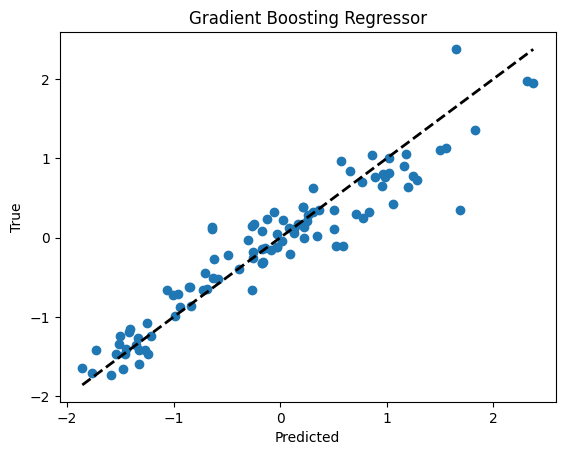

In [25]:
plt.scatter(y_test, y_pred_gbr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Gradient Boosting Regressor")
plt.show()

##### **e) Extreme Gradient Boosting(XGBoost)**

In [26]:

import xgboost as xgb
from xgboost import XGBRegressor

xgbr = XGBRegressor(n_estimators=1000, random_state=0)
xgbr.fit(X_train, y_train)
y_pred_xgbr=xgbr.predict(X_test)
xgbr_r2=xgbr.score(X_test,y_test)
xgbr_r1=xgbr.score(X_train,y_train)

print("Model \t\t\t\t\t\t Phase \t\t\t R2")

print(" Extreme Gradient Boosting Regressor \t\t Train \t\t\t{:.2f}".format(xgbr_r1))

print(" Extreme Gradient Boosting Regressor \t\t Test\t\t\t{:.2f}".format(xgbr_r2))


Model 						 Phase 			 R2
 Extreme Gradient Boosting Regressor 		 Train 			1.00
 Extreme Gradient Boosting Regressor 		 Test			0.93


In [27]:
# Compute feature importance according to xgboost

print(xgbr.feature_importances_)

[0.21043381 0.15521361 0.07180507 0.1288713  0.18522598 0.02607334
 0.05799314 0.16438365]


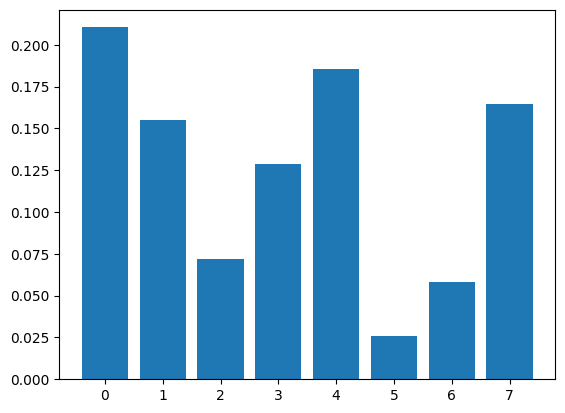

In [28]:
# Ici l'importance est calcule selon le gain conformement a la documentation ligne 1281 ce qui explique la difference entre les graphs
plt.bar(range(len(xgbr.feature_importances_)), xgbr.feature_importances_)
plt.show()

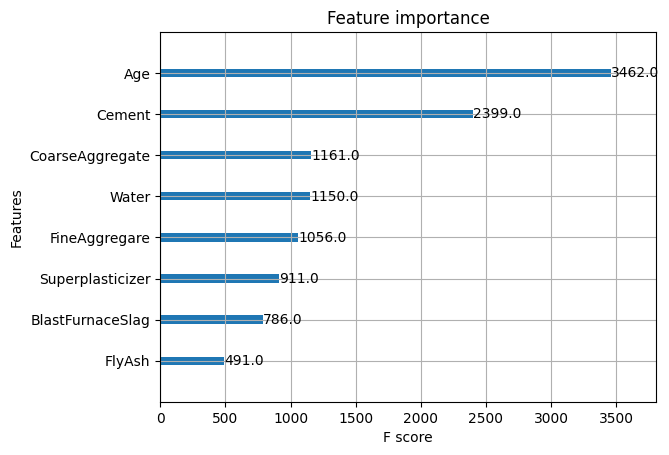

In [29]:
from xgboost import plot_importance
# ici l'importance des caracteristique est calcule selon le poids, valeur juste a la fin des barres
plot_importance(xgbr)
plt.show()

#### Definir le score d'importance a calculer

In [30]:
 
  # gain" - le gain moyen sur l'ensemble des divisions dans lesquelles la caractéristique est utilisée.

xgbr.get_booster().get_score(importance_type='gain')

{'Cement': 0.23054687678813934,
 'BlastFurnaceSlag': 0.1700487732887268,
 'FlyAsh': 0.07866813242435455,
 'Water': 0.14118869602680206,
 'Superplasticizer': 0.20292970538139343,
 'CoarseAggregate': 0.028565403074026108,
 'FineAggregare': 0.06353607028722763,
 'Age': 0.18009528517723083}

In [31]:
# 'total_gain' - le gain total sur l'ensemble des divisions dans lesquelles la caractéristique est utilisée.
xgbr.get_booster().get_score(importance_type='total_gain')

{'Cement': 553.0819702148438,
 'BlastFurnaceSlag': 133.65834045410156,
 'FlyAsh': 38.62605285644531,
 'Water': 162.36700439453125,
 'Superplasticizer': 184.86895751953125,
 'CoarseAggregate': 33.164432525634766,
 'FineAggregare': 67.0940933227539,
 'Age': 623.4898681640625}

In [32]:
# poids" - le nombre de fois qu'une caractéristique est utilisée pour diviser les données dans tous les arbres.
xgbr.get_booster().get_score(importance_type='weight')

{'Cement': 2399.0,
 'BlastFurnaceSlag': 786.0,
 'FlyAsh': 491.0,
 'Water': 1150.0,
 'Superplasticizer': 911.0,
 'CoarseAggregate': 1161.0,
 'FineAggregare': 1056.0,
 'Age': 3462.0}

In [33]:
#    cover" - la couverture moyenne sur l'ensemble des divisions dans lesquelles la caractéristique est utilisée.
xgbr.get_booster().get_score(importance_type='cover')


{'Cement': 106.02709197998047,
 'BlastFurnaceSlag': 167.5572509765625,
 'FlyAsh': 208.30142211914062,
 'Water': 187.3495635986328,
 'Superplasticizer': 192.6256866455078,
 'CoarseAggregate': 208.6675262451172,
 'FineAggregare': 200.6458282470703,
 'Age': 80.6796646118164}

In [34]:
# 'total_cover' - la couverture totale sur l'ensemble des divisions dans lesquelles l'élément est utilisé.
xgbr.get_booster().get_score(importance_type='total_cover')


{'Cement': 254359.0,
 'BlastFurnaceSlag': 131700.0,
 'FlyAsh': 102276.0,
 'Water': 215452.0,
 'Superplasticizer': 175482.0,
 'CoarseAggregate': 242263.0,
 'FineAggregare': 211882.0,
 'Age': 279313.0}

##### Afficher la foret d'arbre construit par xgboost

<AxesSubplot: >

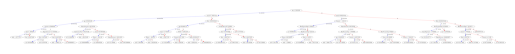

In [35]:
from xgboost import plot_tree
import graphviz
plot_tree(xgbr)

##### **f) Light Gradient Boosting Machine(LightGBM)**

In [39]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

lgbmr = LGBMRegressor(n_estimators=100, random_state=0)
lgbmr.fit(X_train, y_train)
y_pred_lgbmr=lgbmr.predict(X_test)
lgbmr_r2=lgbmr.score(X_test,y_test)

print("Model \t\t\t\t\t \tR2")
print("Light Gradient Boosting Regressor \t\t{:.2f}".format(lgbmr_r2))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000172 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1066
[LightGBM] [Info] Number of data points in the train set: 927, number of used features: 8
[LightGBM] [Info] Start training from score 0.009573
Model 					 	R2
Light Gradient Boosting Regressor 		0.94


##### **g) Categorical Boosting(CatBoost)**

In [40]:
import catboost as catb
from catboost import CatBoostRegressor
catbr = CatBoostRegressor(n_estimators=1000, random_state=0)
catbr.fit(X_train, y_train)
y_pred_catbr=catbr.predict(X_test)
catbr_r1=catbr.score(X_train,y_train)
catbr_r2=catbr.score(X_test,y_test)

print("Model \t\t\t\t\t\t Phase \t\t\t R2")
print(" Extreme Gradient Boosting Regressor \t\t Train \t\t\t{:.2f}".format(catbr_r1))
print(" Extreme Gradient Boosting Regressor \t\t Test\t\t\t{:.2f}".format(catbr_r2))

Learning rate set to 0.040456
0:	learn: 0.9780267	total: 8.48ms	remaining: 8.47s
1:	learn: 0.9526081	total: 12ms	remaining: 5.98s
2:	learn: 0.9328785	total: 19.7ms	remaining: 6.54s
3:	learn: 0.9093300	total: 21.7ms	remaining: 5.39s
4:	learn: 0.8875484	total: 24.4ms	remaining: 4.85s
5:	learn: 0.8654736	total: 26.2ms	remaining: 4.34s
6:	learn: 0.8439899	total: 28.3ms	remaining: 4.01s
7:	learn: 0.8256199	total: 30.8ms	remaining: 3.81s
8:	learn: 0.8084291	total: 32.5ms	remaining: 3.58s
9:	learn: 0.7897514	total: 35.6ms	remaining: 3.52s
10:	learn: 0.7713156	total: 44.9ms	remaining: 4.04s
11:	learn: 0.7553193	total: 50.3ms	remaining: 4.14s
12:	learn: 0.7393054	total: 55.8ms	remaining: 4.24s
13:	learn: 0.7245613	total: 58.8ms	remaining: 4.14s
14:	learn: 0.7093264	total: 62.8ms	remaining: 4.12s
15:	learn: 0.6965446	total: 65.7ms	remaining: 4.04s
16:	learn: 0.6834992	total: 69.4ms	remaining: 4.01s
17:	learn: 0.6700626	total: 72.7ms	remaining: 3.96s
18:	learn: 0.6572719	total: 76ms	remaining: 3.

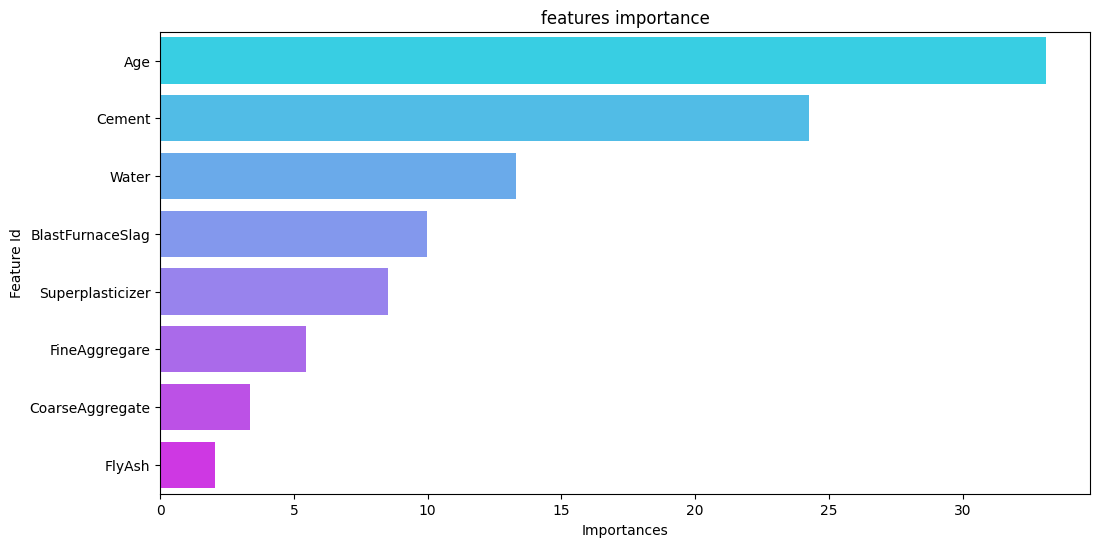

In [41]:
# Create a dataframe of feature importance 
df_feature_importance = pd.DataFrame(catbr.get_feature_importance(prettified=True))
#plotting feature importance
plt.figure(figsize=(12, 6))
feature_plot= sns.barplot(x="Importances", y="Feature Id", data=df_feature_importance,palette="cool")
plt.title('features importance')
plt.show()